# Import Libraries

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### From sklearn - Preprocesing 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Dimension reduction 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Clustering 
from sklearn.manifold import TSNE

# K-fold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

# From sklearn - Model creation

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import multilabel_confusion_matrix

from sklearn import metrics 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

-----
# Reading files and merging features with labels

In [213]:
#dataset = pd.read_csv("Genes\data.csv")
dataset = pd.read_csv('/Users/pedrorodriguezdeledesmajimenez/1_Coding/Datasets/RUG_Pattern-recognition_Assignment-2/Task 1/Genres/data.csv')

#labels = pd.read_csv("Genes\labels.csv")
dataset_labels =pd.read_csv('/Users/pedrorodriguezdeledesmajimenez/1_Coding/Datasets/RUG_Pattern-recognition_Assignment-2/Task 1/Genres/labels.csv')

In [214]:
# Merging both datasets and removing first column

dataset = pd.merge(dataset, dataset_labels, on='Unnamed: 0').drop("Unnamed: 0", axis=1)

In [215]:
print(f'Dataset consists of {dataset.shape[0]} input sample vectors, each vector has {dataset.shape[1]} '\
      f'gene features.\nAlso the availbale classes are {len(dataset["Class"].unique())}.'\
      f' The possible choises are {", ".join(val for val in dataset.Class.unique())}.')
class_counts = dataset.Class.value_counts()
print(f'As we can see, we have class imbalance.\n\n{class_counts.to_string()}')

Dataset consists of 801 input sample vectors, each vector has 20532 gene features.
Also the availbale classes are 5. The possible choises are PRAD, LUAD, BRCA, KIRC, COAD.
As we can see, we have class imbalance.

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78


----
# Preprocesing data

###  Encode the labels of the dataset

In [216]:
# Encode the labels and updaate values

le = preprocessing.LabelEncoder()

dataset["Class"] = le.fit_transform(dataset_labels.drop("Unnamed: 0", axis=1).values.ravel())

In [217]:
# Let´s store all the labels

keys = le.classes_

# And now store labels with their encoded value 

values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
dictionary

{'BRCA': 0, 'COAD': 1, 'KIRC': 2, 'LUAD': 3, 'PRAD': 4}

In [218]:
dataset.Class.value_counts()

0    300
2    146
3    141
4    136
1     78
Name: Class, dtype: int64

### Some parameters before normalizing

In [219]:
stats=pd.DataFrame()
stats["mean"]=dataset.mean()
stats["Std.Dev"]=dataset.std()
stats["Var"]=dataset.var()
stats.sort_values(by=['Var','mean'],ascending=False)

,mean,Std.Dev,Var
gene_9176,3.946748,6.690579,44.763849
gene_9175,3.771632,6.030086,36.361940
gene_15898,3.621030,5.874003,34.503915
gene_15301,5.506275,5.784356,33.458776
gene_15589,3.849006,5.596950,31.325845
...,...,...,...
gene_18915,0.000000,0.000000,0.000000
gene_19450,0.000000,0.000000,0.000000
gene_19451,0.000000,0.000000,0.000000
gene_19452,0.000000,0.000000,0.000000


### Normalize the dataset: min_max_scaler



In [220]:
# Lets store the dataset values without the columns titles
x = dataset.iloc[:, :-1].values 

In [221]:
# Let´s create an instance with the normalice function
min_max_scaler = preprocessing.MinMaxScaler()

# Let´s fit the normilice function
x_scaled = min_max_scaler.fit_transform(x)

# Let´s put in the dataframe the values scaled
dataset.iloc[:, :-1] = pd.DataFrame(x_scaled)

In [222]:
stats=pd.DataFrame()
stats["mean"]=dataset.mean()
stats["Std.Dev"]=dataset.std()
stats["Var"]=dataset.var()
stats.sort_values(by=['Var','mean'],ascending=False)

,mean,Std.Dev,Var
Class,1.669164,1.531065,2.344160
gene_4773,0.383887,0.411448,0.169290
gene_8891,0.364385,0.398958,0.159168
gene_19913,0.376816,0.395887,0.156726
gene_19313,0.348911,0.390790,0.152717
...,...,...,...
gene_18915,0.000000,0.000000,0.000000
gene_19450,0.000000,0.000000,0.000000
gene_19451,0.000000,0.000000,0.000000
gene_19452,0.000000,0.000000,0.000000


### Normalize the dataset: StandardScaler

In [223]:
scaler = StandardScaler()
x_scaled_2 = scaler.fit_transform(x)

In [224]:
dataset2 = dataset

# Let´s put in the dataframe the values scaled
dataset2.iloc[:, :-1] = pd.DataFrame(x_scaled_2)

In [225]:
stats=pd.DataFrame()
stats["mean"]=dataset2.mean()
stats["Std.Dev"]=dataset2.std()
stats["Var"]=dataset2.var()
stats.sort_values(by=['Var','mean'],ascending=False)

,mean,Std.Dev,Var
Class,1.669164e+00,1.531065,2.34416
gene_12639,3.934985e-16,1.000625,1.00125
gene_12825,-5.052312e-16,1.000625,1.00125
gene_12363,-2.617202e-16,1.000625,1.00125
gene_17071,-1.881904e-16,1.000625,1.00125
...,...,...,...
gene_18915,0.000000e+00,0.000000,0.00000
gene_19450,0.000000e+00,0.000000,0.00000
gene_19451,0.000000e+00,0.000000,0.00000
gene_19452,0.000000e+00,0.000000,0.00000


#### Input for the reduction algorithms

In [294]:
dataset.shape

(801, 20532)

-----------
## Dimensionality reduction:  1.Principal Component Analysis

In [226]:
# Create PCA object to keep 95% of variance

pca = PCA(0.70)

# Apply PCA in input vector
pca.fit(dataset.iloc[:,:-1]) 

# Save results in an np.array
reduced = pca.transform(dataset.iloc[:,:-1])

# Save labels in an np.array
x = dataset['Class'].to_numpy()

# Create final dataframe with reduced dimensions
dataset_reduced_PCA = pd.DataFrame(np.column_stack((reduced, x)))

Number of features in the original dataset: 20532 <br>
After applying PCA to the dataset, we end up with:

In [228]:
dataset_reduced_PCA.shape[1]

86

In [229]:
# We are going to rename the columns name with the PCA components name

for count, column_name in enumerate(dataset_reduced_PCA.columns):
    
    if count < len(dataset_reduced_PCA.columns)-1:
        
        dataset_reduced_PCA.rename(columns={column_name : f"PCA{count+1}"}, inplace=True)
    else:
        dataset_reduced_PCA.rename(columns={column_name : "Label"}, inplace=True)

The dataset after applying the PCA analysis has the following form:

In [230]:
dataset_reduced_PCA.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA77,PCA78,PCA79,PCA80,PCA81,PCA82,PCA83,PCA84,PCA85,Label
0,-57.446987,95.410981,74.301543,-12.166781,7.981831,36.157573,-7.668542,19.951444,0.142216,3.035240,...,2.925250,-7.875992,-5.100771,-6.413827,3.513128,-3.271264,0.988052,6.721325,-2.186021,4.0
1,-16.919430,0.732470,-64.072900,-2.095308,-25.426430,27.784178,-16.132765,-17.031383,-22.023874,-27.923308,...,-0.694985,3.565511,-11.751542,-3.894333,8.143514,-2.452563,4.546374,-8.378011,1.399872,3.0
2,-70.345218,-19.303327,20.488240,48.102893,24.437757,17.462510,20.706772,-47.626817,-28.647648,-12.784676,...,-7.094904,-4.403152,14.420521,8.121100,-7.207487,-4.296174,-23.318893,8.866835,10.332360,4.0
3,-49.161591,-9.227586,61.243770,37.805744,1.038889,23.240002,-4.801039,-21.554809,-15.375067,-12.881511,...,0.122393,-1.856355,-3.689475,-7.972390,-1.834695,-3.923945,-3.511283,-13.847275,-4.993018,4.0
4,-18.132534,-51.327797,16.598116,-17.699201,26.389130,-1.551573,-6.266101,12.336677,-4.233837,28.804476,...,0.632124,0.637069,-7.055203,-3.633323,2.293056,-0.141774,-2.314885,-3.621200,5.502809,0.0


#### Lets display the explained variance of each PCA component

In [231]:
pca.explained_variance_ratio_.shape

(85,)

In [232]:
# To see the percentage of variation thaat each principal components accounts for

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var.shape

(85,)

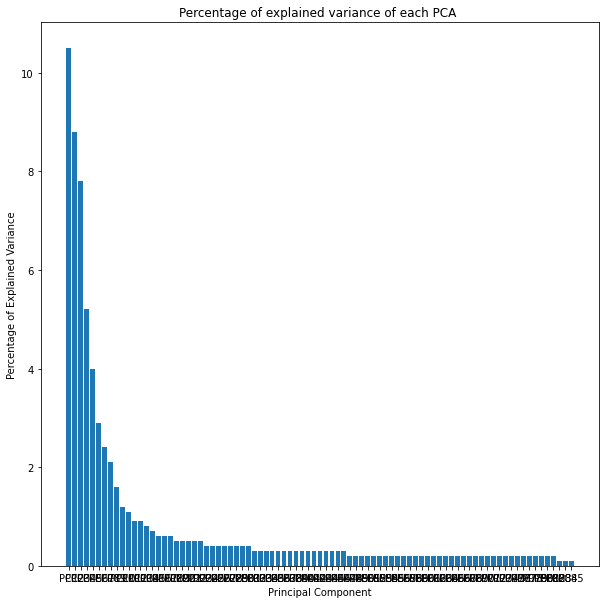

In [233]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize=(10,10))
plt.bar(x=range(1,len(per_var)+1),height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Percentage of explained variance of each PCA ')
plt.show()

In [234]:
# Here we calculate the cumulative sum of the variance so we can plot and see how the variance of the PCA evolute 

cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)
cum_sum_eigenvalues.shape


(85,)

In [235]:
length = cum_sum_eigenvalues.shape[0]
length

85

In [236]:
# Let´s see the cummulative variance
cum_sum_eigenvalues[length-1]

0.7014140067873336

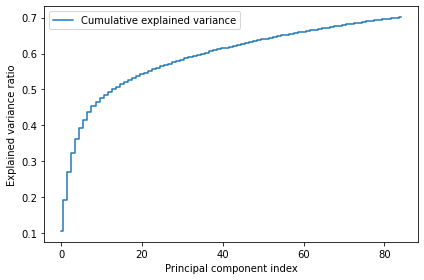

In [237]:
# Plot with regards of components

#plt.bar(range(0,len(exp_var_pca[:150])), exp_var_pca[:150], alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [238]:
#Final dataset after feature extraction and further process

dataset_reduced_PCA.shape

(801, 86)

-----
## Dimensionality reduction:  2.Isomap Embedding

https://scikit-learn.org/stable/modules/manifold.html#isomap

Isomap Embedding is a non-linear dimensionality reduction technique that creates an embedding of the dataset and tries to preserve the relationships in the dataset.

Isomap looks for a lower-dimensional embedding which maintains distances between all points. 

In [239]:
from sklearn.manifold import Isomap

In [240]:
# Create a ISO object

iso = Isomap(n_neighbors=15, n_components=100)

In [241]:
# Apply ISO in input vector

iso.fit(dataset.iloc[:,:-1]) 

Isomap(n_components=100, n_neighbors=15)

In [242]:
# Save results in an np.array

reduced_iso = iso.transform(dataset.iloc[:,:-1])
reduced_iso.shape

(801, 100)

In [243]:
# Save labels in an np.array

x_iso = dataset['Class'].to_numpy()

In [244]:
# Create final dataframe with reduced dimensions

dataset_reduced_ISO = pd.DataFrame(np.column_stack((reduced_iso, x_iso)))

Number of features in the original dataset: 20532 <br>
After applying ISO to the dataset, we end up with:

In [245]:
dataset_reduced_ISO.shape[1]

101

In [246]:
# We are going to rename the columns name with the PCA components name

for count, column_name in enumerate(dataset_reduced_ISO.columns):
    
    if count < len(dataset_reduced_ISO.columns)-1:
        
        dataset_reduced_ISO.rename(columns={column_name : f"PCA{count+1}"}, inplace=True)
    else:
        dataset_reduced_ISO.rename(columns={column_name : "Label"}, inplace=True)

In [247]:
dataset_reduced_ISO.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA92,PCA93,PCA94,PCA95,PCA96,PCA97,PCA98,PCA99,PCA100,Label
0,-204.284070,382.591700,-98.669342,-125.592621,244.417180,64.955152,52.070934,-20.757499,-14.284298,23.960479,...,-11.728796,10.549278,-15.049239,-1.134575,-6.318578,35.567805,18.769958,9.183582,2.141035,4.0
1,33.957105,-118.542560,246.842639,-203.110077,-32.433554,53.879758,49.599605,66.962019,32.319971,-1.055794,...,17.913463,-13.695948,-3.680745,1.604514,-27.294478,-15.574784,26.068665,46.449769,-23.702384,3.0
2,-326.397143,250.087673,-328.819288,-14.241610,-182.860053,133.826225,252.327899,-44.579186,-92.269718,93.054558,...,-15.384374,-1.603647,12.658962,-31.585422,-11.966543,-15.462362,39.194103,-19.653375,11.599901,4.0
3,-130.180141,415.987085,-123.378111,-43.174811,-56.212688,27.816050,104.299740,-93.810262,-73.860074,-2.600294,...,-4.151122,3.723055,12.568576,-1.493775,-13.598658,3.966436,7.342133,11.876043,-7.235017,4.0
4,-79.888543,-203.040379,-194.865590,-9.589059,-39.402406,24.994512,25.022304,21.450059,-87.126404,-8.618741,...,-28.884257,7.148842,-0.581330,15.176347,-39.053505,4.942949,6.417614,10.165027,23.343420,0.0


-----------
## Dimensionality reduction:  3.Linear Discriminant Analysis

Linear Discriminant Analysis, or LDA, is a multi-class classification algorithm that can be used for dimensionality reduction.

Is like PCA, but it focuses on maximizing the seperatibility among categories

The number of dimensions for the projection is limited to 1 and C-1, where C is the number of classes.

In [381]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [474]:
dataset.shape

(801, 20532)

In [475]:
# define transform
lda = LinearDiscriminantAnalysis(n_components=2)

In [476]:
# prepare transform on dataset
lda.fit(dataset.iloc[:,:-1].values, dataset.iloc[:,-1:].values.ravel())

LinearDiscriminantAnalysis(n_components=2)

In [477]:
# apply transform to dataset
reduced_lda = lda.transform(dataset.iloc[:,:-1].values)
reduced_lda.shape

(801, 2)

In [478]:
# Save labels in an np.array

y_lda = dataset['Class'].to_numpy()

In [479]:
# Create final dataframe with reduced dimensions

dataset_reduced_LDA = pd.DataFrame(np.column_stack((reduced_lda, y_lda)))

#### Lets display the explained variance of each PCA component

In [480]:
lda.explained_variance_ratio_.shape

(2,)

In [481]:
# To see the percentage of variation thaat each principal components accounts for

per_var = np.round(lda.explained_variance_ratio_*100, decimals=1)
per_var.shape

(2,)

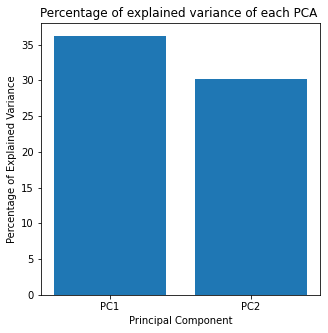

In [482]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize=(5,5))
plt.bar(x=range(1,len(per_var)+1),height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Percentage of explained variance of each PCA ')
plt.show()

In [483]:
# Here we calculate the cumulative sum of the variance so we can plot and see how the variance of the PCA evolute 

sum_lda = np.cumsum(lda.explained_variance_ratio_)
sum_lda.shape


(2,)

In [484]:
length = sum_lda.shape[0]
length

2

In [485]:
# Let´s see the cummulative variance
sum_lda[length-1]

0.6637513134816208

In [486]:
# Here we calculate the cumulative sum of the variance so we can plot and see how the variance of the PCA evolute 

cum_sum_lda = np.cumsum(lda.explained_variance_ratio_)

length = cum_sum_lda.shape[0]

# Let´s see the cummulative variance
cum_sum_lda[length-1]

0.6637513134816208

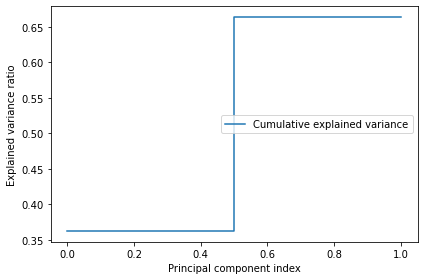

In [487]:
# Plot with regards of components

#plt.bar(range(0,len(exp_var_pca[:150])), exp_var_pca[:150], alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_lda)), cum_sum_lda, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Output of preprocesing 

In [488]:
dataset_reduced_PCA.shape

(801, 86)

In [489]:
dataset_reduced_ISO.shape

(801, 101)

In [490]:
dataset_reduced_LDA.shape

(801, 3)

------
## Input data for all the model bellow

#For ORIGINAL data as input

input_data = dataset.iloc[:,:-1].values
label_data = dataset.iloc[:,-1].values

#For PCA REDUCED data as input

input_data = dataset_reduced_PCA.iloc[:,:-1].values
label_data = dataset_reduced_PCA.iloc[:,-1].values

In [491]:
#For LDA REDUCED data as input

input_data = dataset_reduced_LDA.iloc[:,:-1].values
label_data = dataset_reduced_LDA.iloc[:,-1].values

### Models

1. KNN

2. Logistic regression

3. Decision tree

--------------
# Model Implementation:  KNN

###  80% Training data, 20% test data

In [492]:
# We split the data  
X_train, X_test, y_train, y_test = train_test_split(input_data,label_data, test_size=0.2)

In [493]:
error = []

# Calculating error for nº neighbors

for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    preds = knn.predict(X_test)
    
    squared_error = np.power(y_test - preds,2)
    error.append(np.mean(squared_error))

Text(0, 0.5, 'Mean Squared Error.')

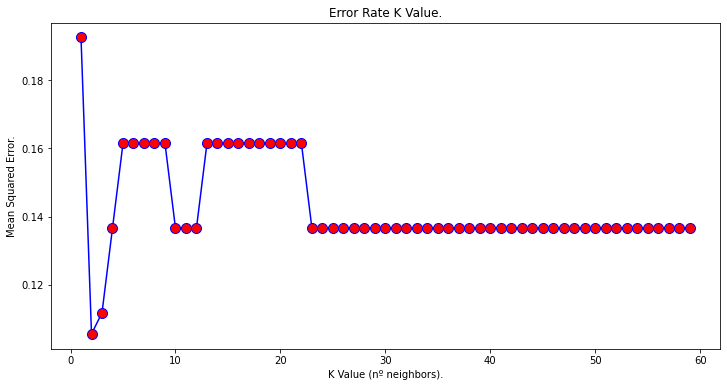

In [494]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 60), error, color='blue', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate K Value.')
plt.xlabel('K Value (nº neighbors).')
plt.ylabel('Mean Squared Error.')
#plt.savefig("KNN_error_over_multiple_neighbors.png")

In [495]:
# Build and train the model with the value selected: k= 10
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [496]:
# We predict the labels of the test data
y_pred = KNN.predict(X_test)

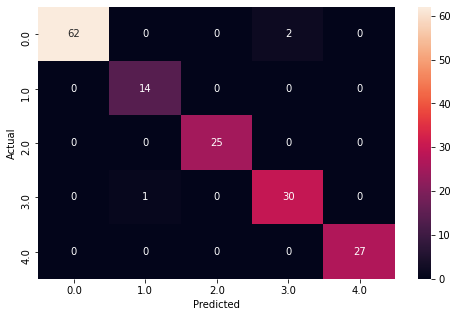

In [497]:
#Confusion matrix to evaluate the model 
plt.figure(figsize=(8,5))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], 
                               colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
#plt.savefig("Confusion_Matrix_KNN.png")
plt.show()

In [498]:
# Accuracy of the model
metrics.accuracy_score(y_test, y_pred)

0.9813664596273292

In [499]:
print(f"Accuracy:{metrics.accuracy_score(y_test, y_pred)}")

Accuracy:0.9813664596273292


In [500]:
print(f'More metrics about the model.\n\n' \
      f'{metrics.classification_report(y_test, y_pred, labels=[0.0, 1.0, 2.0, 3.0, 4.0])}')

More metrics about the model.

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        64
         1.0       0.93      1.00      0.97        14
         2.0       1.00      1.00      1.00        25
         3.0       0.94      0.97      0.95        31
         4.0       1.00      1.00      1.00        27

    accuracy                           0.98       161
   macro avg       0.97      0.99      0.98       161
weighted avg       0.98      0.98      0.98       161



### Stratified Kfold

In [501]:
#Need help to store values and plot Sarandis

scores = []
error = []

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

for k in range(9, 10):
    folds = StratifiedKFold(n_splits=k, shuffle = True, random_state = 100)
    
    for i in range(9, 10):
        knn = KNeighborsClassifier(n_neighbors=i)
               
        for train_index, test_index in folds.split(input_data,label_data):
            X_train, X_test, y_train, y_test = input_data[train_index], input_data[test_index], label_data[train_index], label_data[test_index]
            
            scores.append(get_score(knn, X_train, X_test, y_train, y_test))
            
            preds = knn.predict(X_test)
            squared_error = np.power(y_test - preds,2)
            error.append(np.mean(squared_error))
            
# Help with the plot

In [502]:
# After studying the optimal parameters, we run the model with the selected ones

knn = KNeighborsClassifier(n_neighbors=10)
folds = StratifiedKFold(n_splits=5, shuffle = True, random_state = 100)

scores = []

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

# Index of the spliting
for train_index, test_index in folds.split(input_data,label_data):
    X_train, X_test, y_train, y_test = input_data[train_index], input_data[test_index], label_data[train_index], label_data[test_index]
    scores.append(get_score(knn, X_train, X_test, y_train, y_test))


In [503]:
# We predict the labels of the test data (Depending on the fold we have different, how we do it with the confusion matrix)
y_pred = knn.predict(X_test)

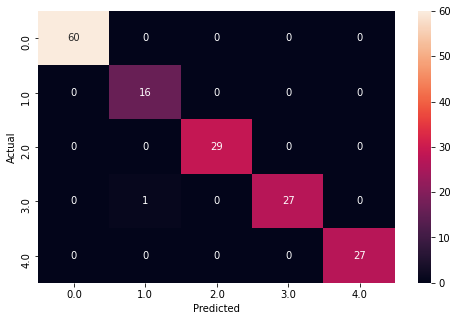

In [504]:
#Confusion matrix to evaluate the model 
plt.figure(figsize=(8,5))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], 
                               colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.savefig("Confusion_Matrix_KNN.png")
plt.show()

In [505]:
# Accuracy of the model
metrics.accuracy_score(y_test, y_pred)

0.99375

In [506]:
print(f"Accuracy:{metrics.accuracy_score(y_test, y_pred)}")

Accuracy:0.99375


In [507]:
print(f'More metrics about the model.\n\n' \
      f'{metrics.classification_report(y_test, y_pred, labels=[0.0, 1.0, 2.0, 3.0, 4.0])}')

More metrics about the model.

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        60
         1.0       0.94      1.00      0.97        16
         2.0       1.00      1.00      1.00        29
         3.0       1.00      0.96      0.98        28
         4.0       1.00      1.00      1.00        27

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



--------
# Model Implementation: Logistic regression

###  80% Training data, 20% test data

In [508]:
# We split the data  
X_train, X_test, y_train, y_test = train_test_split(input_data,label_data, test_size=0.2)

In [509]:
# Building and training the model
LR = LogisticRegression(max_iter=300) # Parameters to tune?
LR.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [510]:
# We predict the labels of the test data
y_pred = LR.predict(X_test)

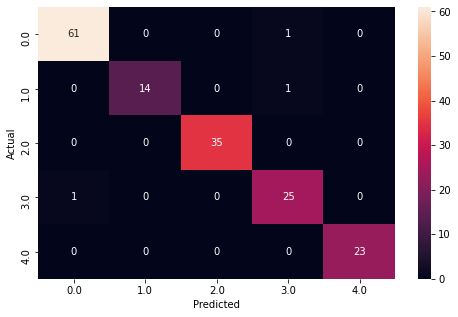

In [511]:
#Confusion matrix to evaluate the model 
plt.figure(figsize=(8,5))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], 
                               colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
#plt.savefig("Confusion_Matrix_KNN.png")
plt.show()

In [512]:
# Accuracy of the model
metrics.accuracy_score(y_test, y_pred)

0.9813664596273292

In [513]:
print(f"Accuracy:{metrics.accuracy_score(y_test, y_pred)}")

Accuracy:0.9813664596273292


In [514]:
print(f'More metrics about the model.\n\n' \
      f'{metrics.classification_report(y_test, y_pred, labels=[0.0, 1.0, 2.0, 3.0, 4.0])}')

More metrics about the model.

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        62
         1.0       1.00      0.93      0.97        15
         2.0       1.00      1.00      1.00        35
         3.0       0.93      0.96      0.94        26
         4.0       1.00      1.00      1.00        23

    accuracy                           0.98       161
   macro avg       0.98      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161



### Stratified Kfold

In [515]:
score_average = []
error_average = []

k_values = []

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

LR = LogisticRegression(max_iter=300) # Parameters to tune?

for k in range(5, 10):
    folds = StratifiedKFold(n_splits=k, shuffle = True, random_state = 100)
    k_values.append(k)
    error = []
    scores = []
                   
    for train_index, test_index in folds.split(input_data,label_data):
        X_train, X_test, y_train, y_test = input_data[train_index], input_data[test_index], label_data[train_index], label_data[test_index]
        
        scores.append(get_score(LR, X_train, X_test, y_train, y_test))
        
        preds = LR.predict(X_test)
        squared_error = np.power(y_test - preds,2)
        error.append(np.mean(squared_error))
        
    error_average.append(np.mean(error))
    score_average.append(round(np.mean(scores),4))

In [516]:
print(np.mean(score_average))

0.98628


Text(0, 0.5, 'Mean Score.')

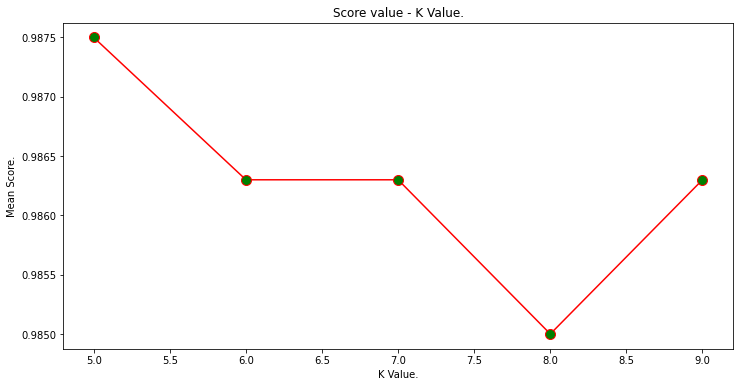

In [517]:
#SCORE PLOT
plt.figure(figsize=(12, 6))
#plt.plot(k_values, error_average, color='blue', marker='o',markerfacecolor='red', markersize=10)
plt.plot(k_values, score_average, color='red', marker='o', markerfacecolor='green', markersize=10)

plt.title('Score value - K Value.')
plt.xlabel('K Value.')
plt.ylabel('Mean Score.')
#plt.savefig("KNN_error_over_multiple_neighbors.png")

Text(0, 0.5, 'Mean Squared Error.')

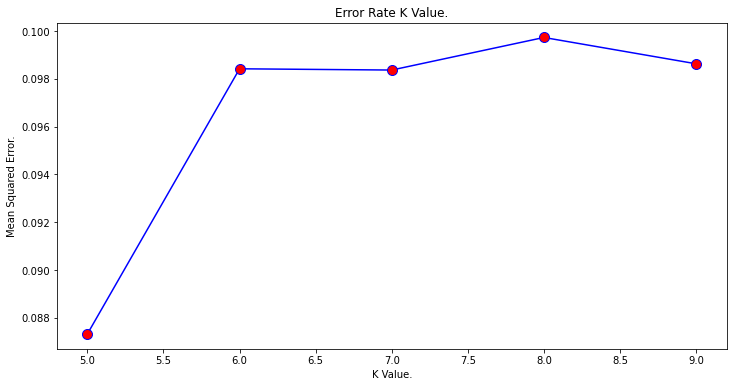

In [518]:
#SQUARE ERROR PLOT
plt.figure(figsize=(12, 6))
plt.plot(k_values, error_average, color='blue', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(k_values, score_average, color='red', marker='o', markerfacecolor='green', markersize=10)

plt.title('Error Rate K Value.')
plt.xlabel('K Value.')
plt.ylabel('Mean Squared Error.')
#plt.savefig("KNN_error_over_multiple_neighbors.png")

In [519]:
# After studying the optimal parameters, we run the model with the selected ones

k = 5

LR = LogisticRegression() # Parameters to tune?

folds = StratifiedKFold(n_splits=k, shuffle = True, random_state = 100)

scores = []

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

# Index of the spliting
for train_index, test_index in folds.split(input_data,label_data):
    X_train, X_test, y_train, y_test = input_data[train_index], input_data[test_index], label_data[train_index], label_data[test_index]
    scores.append(get_score(LR, X_train, X_test, y_train, y_test))

print(np.mean(scores))

0.9875232919254658


In [520]:
# We predict the labels of the test data (Depending on the fold we have different, how we do it with the confusion matrix)
y_pred = LR.predict(X_test)

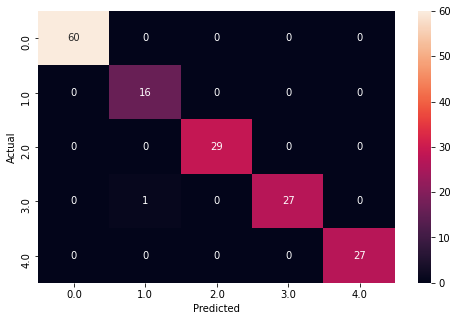

In [521]:
#Confusion matrix to evaluate the model 
plt.figure(figsize=(8,5))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], 
                               colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.savefig("Confusion_Matrix_KNN.png")
plt.show()

In [522]:
# Accuracy of the model --> This is just for this iteration, the real score is the mean of all the scores
metrics.accuracy_score(y_test, y_pred)

0.99375

In [523]:
print(f"Accuracy:{metrics.accuracy_score(y_test, y_pred)}")

Accuracy:0.99375


In [524]:
print(f'More metrics about the model.\n\n' \
      f'{metrics.classification_report(y_test, y_pred, labels=[0.0, 1.0, 2.0, 3.0, 4.0])}')

More metrics about the model.

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        60
         1.0       0.94      1.00      0.97        16
         2.0       1.00      1.00      1.00        29
         3.0       1.00      0.96      0.98        28
         4.0       1.00      1.00      1.00        27

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



--------------
# Model Implementation: Decision Tree

###  80% Training data, 20% test data

In [525]:
# We split the data  
X_train, X_test, y_train, y_test = train_test_split(input_data,label_data, test_size=0.2)

In [526]:
# Creating model and predicting output values on testing data.
DT = DecisionTreeClassifier()

DT.fit(X_train,y_train)

y_pred = DT.predict(X_test)

In [527]:
# We predict the labels of the test data
y_pred = DT.predict(X_test)

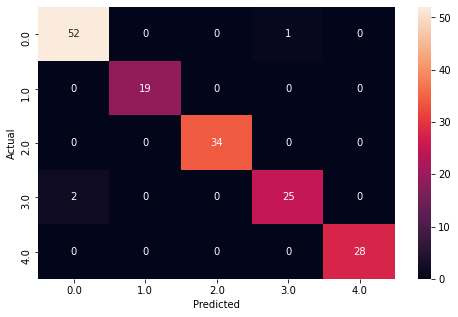

In [528]:
#Confusion matrix to evaluate the model 
plt.figure(figsize=(8,5))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], 
                               colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
#plt.savefig("Confusion_Matrix_KNN.png")
plt.show()

In [529]:
# Accuracy of the model
metrics.accuracy_score(y_test, y_pred)

0.9813664596273292

In [530]:
print(f"Accuracy:{metrics.accuracy_score(y_test, y_pred)}")

Accuracy:0.9813664596273292


In [531]:
print(f'More metrics about the model.\n\n' \
      f'{metrics.classification_report(y_test, y_pred, labels=[0.0, 1.0, 2.0, 3.0, 4.0])}')

More metrics about the model.

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        53
         1.0       1.00      1.00      1.00        19
         2.0       1.00      1.00      1.00        34
         3.0       0.96      0.93      0.94        27
         4.0       1.00      1.00      1.00        28

    accuracy                           0.98       161
   macro avg       0.98      0.98      0.98       161
weighted avg       0.98      0.98      0.98       161



### Stratified Kfold

In [532]:
error_average = []
score_average = []

k_values = []


def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

DT = DecisionTreeClassifier() # Parameters to tune?

for k in range(5, 10):
    folds = StratifiedKFold(n_splits=k, shuffle = True, random_state = 100)
    k_values.append(k)
    error = []
    scores = []
                   
    for train_index, test_index in folds.split(input_data,label_data):
        X_train, X_test, y_train, y_test = input_data[train_index], input_data[test_index], label_data[train_index], label_data[test_index]
        
        scores.append(get_score(DT, X_train, X_test, y_train, y_test))
        
        preds = DT.predict(X_test)
        squared_error = np.power(y_test - preds,2)
        error.append(np.mean(squared_error))
        
    error_average.append(np.mean(error))
    score_average.append(round(np.mean(scores),4))
    


Text(0, 0.5, 'Mean Score.')

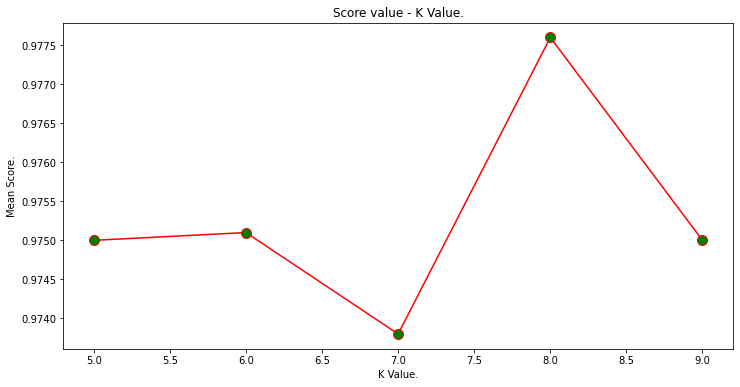

In [533]:
#SCORE PLOT
plt.figure(figsize=(12, 6))
#plt.plot(k_values, error_average, color='blue', marker='o',markerfacecolor='red', markersize=10)
plt.plot(k_values, score_average, color='red', marker='o', markerfacecolor='green', markersize=10)

plt.title('Score value - K Value.')
plt.xlabel('K Value.')
plt.ylabel('Mean Score.')
#plt.savefig("KNN_error_over_multiple_neighbors.png")

Text(0, 0.5, 'Mean Squared Error.')

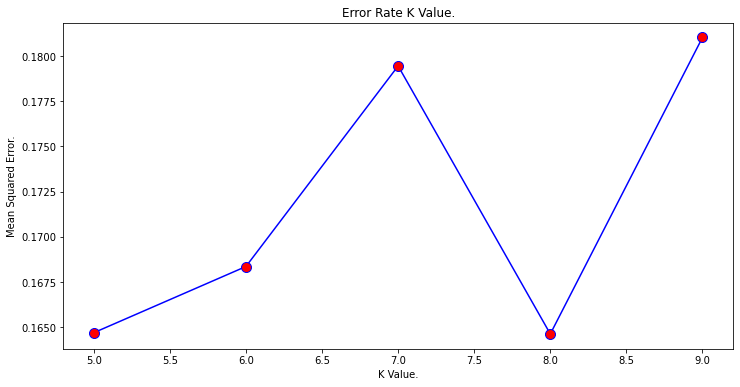

In [534]:
#SQUARE ERROR PLOT
plt.figure(figsize=(12, 6))
plt.plot(k_values, error_average, color='blue', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(k_values, score_average, color='red', marker='o', markerfacecolor='green', markersize=10)

plt.title('Error Rate K Value.')
plt.xlabel('K Value.')
plt.ylabel('Mean Squared Error.')
#plt.savefig("KNN_error_over_multiple_neighbors.png")

In [535]:
# After studying the optimal parameters, we run the model with the selected ones

k = 10

DT = DecisionTreeClassifier() # Parameters to tune?

folds = StratifiedKFold(n_splits=k, shuffle = True, random_state = 100)

scores = []

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

# Index of the spliting
for train_index, test_index in folds.split(input_data,label_data):
    X_train, X_test, y_train, y_test = input_data[train_index], input_data[test_index], label_data[train_index], label_data[test_index]
    scores.append(get_score(DT, X_train, X_test, y_train, y_test))

print(np.mean(scores))

0.9775308641975309


In [536]:
# We predict the labels of the test data (Depending on the fold we have different, how we do it with the confusion matrix)
y_pred = DT.predict(X_test)

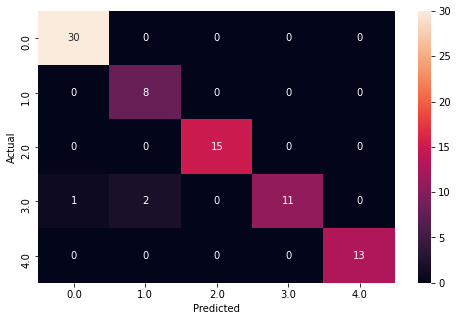

In [537]:
#Confusion matrix to evaluate the model 
plt.figure(figsize=(8,5))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], 
                               colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.savefig("Confusion_Matrix_KNN.png")
plt.show()

In [538]:
# Accuracy of the model
metrics.accuracy_score(y_test, y_pred)

0.9625

In [539]:
print(f"Accuracy:{metrics.accuracy_score(y_test, y_pred)}")

Accuracy:0.9625


In [540]:
print(f'More metrics about the model.\n\n' \
      f'{metrics.classification_report(y_test, y_pred, labels=[0.0, 1.0, 2.0, 3.0, 4.0])}')

More metrics about the model.

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        30
         1.0       0.80      1.00      0.89         8
         2.0       1.00      1.00      1.00        15
         3.0       1.00      0.79      0.88        14
         4.0       1.00      1.00      1.00        13

    accuracy                           0.96        80
   macro avg       0.95      0.96      0.95        80
weighted avg       0.97      0.96      0.96        80



### Decision Tree layout

In [541]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

In [542]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = final_df.columns[:-1], class_names=final_df.Label.unique().astype(str))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

#Image(graph.create_png())

NameError: name 'clf' is not defined

In [ ]:
#cf = multilabel_confusion_matrix(y_test, y_pred, labels=[0.0, 1.0, 2.0, 3.0, 4.0])

In [ ]:
#lda = LinearDiscriminantAnalysis(n_components=3)
#x_r2 = lda.fit(final_df.iloc[:, :-1], final_df.Label).transform(dataset.iloc[:, :-1])

In [ ]:
#corr = dataset.iloc[0:30, 0:30].corr()
#f, ax = plt.subplots(figsize=(14, 10))
#hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
#                 linewidths=.05)